In [1]:
import pandas as pd
df=pd.read_csv("F:/SET_3/FINAL_DATA.csv")
df

,STATE,YEAR,DEATHS_MEN,DEATHS_WOMEN,POPULATION,INTAKE_CAPACITY_MALE,INTAKE_CAPACITY_FEMALE,OCCUPANCY_MALE,OCCUPANCY_FEMALE
0,ANDAMAN & NICOBAR,2018,25,2,2237,2,2,0,0
1,ANDHRA PRADESH,2018,389,18,37577,65,20,54,313
2,ASSAM,2018,99,62,142605,381,354,158,202
3,BIHAR,2018,35,36,213989,100,100,84,72
4,CHANDIGARH,2018,85,9,23330,15,15,12,3
...,...,...,...,...,...,...,...,...,...
84,TELANGANA,2020,71,32,203127,3173,2996,2750,2609
85,TRIPURA,2020,25,17,31645,71,54,62,45
86,UTTAR PRADESH,2020,18,2,62219,25,25,0,0
87,UTTARAKHAND,2020,112,83,873419,0,75,0,127


In [2]:
import numpy as np
# Check for outliers in numerical columns (DEATHS_MEN, DEATHS_WOMEN, POPULATION, etc.)
numerical_columns = ['DEATHS_MEN', 'DEATHS_WOMEN', 'POPULATION', 'INTAKE_CAPACITY_MALE',
                     'INTAKE_CAPACITY_FEMALE', 'OCCUPANCY_MALE', 'OCCUPANCY_FEMALE']

# Calculate the z-scores for each numerical column to identify outliers
z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())

# Define a threshold for outliers (e.g., z-score greater than 3)
outlier_threshold = 3

# Remove rows with outliers in any numerical column
data = df[(z_scores < outlier_threshold).all(axis=1)]

# Print the shape of the cleaned dataset to see how many outliers were removed
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", data.shape)

# Now 'cleaned_dataset' contains the dataset with outliers removed

Original dataset shape: (89, 9)
Cleaned dataset shape: (82, 9)


In [3]:

from scipy.stats import mannwhitneyu


years = [2018, 2019, 2020]
states = data['STATE'].unique()

for year in years:
    print(f"Year {year}:")
    for state in states:
        deaths_men = data[(data['STATE'] == state) & (data['YEAR'] == year)]['DEATHS_MEN']
        deaths_women = data[(data['STATE'] == state) & (data['YEAR'] == year)]['DEATHS_WOMEN']
        
        # Perform Mann-Whitney U test
        stat, p_value = mannwhitneyu(deaths_men, deaths_women)
        
        # Interpret the results
        print(f"State: {state}")
        print(f"Mann-Whitney U Statistic: {stat}")
        print(f"P-Value: {p_value}")
        
        if p_value < 0.05:
            print("Reject the null hypothesis: There is a statistically significant difference between deaths in men and women.")
        else:
            print("Fail to reject the null hypothesis: There is no statistically significant difference between deaths in men and women.")
        
        print("-" * 50)


Year 2018:
State: ANDAMAN & NICOBAR
Mann-Whitney U Statistic: 1.0
P-Value: 1.0
Fail to reject the null hypothesis: There is no statistically significant difference between deaths in men and women.
--------------------------------------------------
State: ASSAM
Mann-Whitney U Statistic: 1.0
P-Value: 1.0
Fail to reject the null hypothesis: There is no statistically significant difference between deaths in men and women.
--------------------------------------------------
State: BIHAR
Mann-Whitney U Statistic: 0.0
P-Value: 1.0
Fail to reject the null hypothesis: There is no statistically significant difference between deaths in men and women.
--------------------------------------------------
State: CHANDIGARH
Mann-Whitney U Statistic: 1.0
P-Value: 1.0
Fail to reject the null hypothesis: There is no statistically significant difference between deaths in men and women.
--------------------------------------------------
State: CHHATTISGARH
Mann-Whitney U Statistic: 1.0
P-Value: 1.0
Fail to r

ValueError: `x` and `y` must be of nonzero size.

In [4]:
#RANK_CORRELATION

import pandas as pd
from scipy.stats import spearmanr

# Assuming your dataset is stored in a DataFrame called 'data'
# data = pd.read_csv('your_dataset.csv')

# Select the variables for which you want to calculate Spearman's rank correlation coefficient
variables = ['DEATHS_MEN', 'DEATHS_WOMEN', 'POPULATION', 'INTAKE_CAPACITY_MALE', 'INTAKE_CAPACITY_FEMALE']

# Calculate Spearman's rank correlation coefficient for each pair of variables
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            correlation, p_value = spearmanr(data[var1], data[var2])
            print(f"Spearman's rank correlation coefficient between {var1} and {var2}: {correlation:.2f}")
            print(f"P-Value: {p_value:.4f}")
            if p_value < 0.05:
                print("The correlation is statistically significant.")
            else:
                print("The correlation is not statistically significant.")
            print("-" * 50)


Spearman's rank correlation coefficient between DEATHS_MEN and DEATHS_WOMEN: 0.79
P-Value: 0.0000
The correlation is statistically significant.
--------------------------------------------------
Spearman's rank correlation coefficient between DEATHS_MEN and POPULATION: 0.43
P-Value: 0.0001
The correlation is statistically significant.
--------------------------------------------------
Spearman's rank correlation coefficient between DEATHS_MEN and INTAKE_CAPACITY_MALE: 0.09
P-Value: 0.3994
The correlation is not statistically significant.
--------------------------------------------------
Spearman's rank correlation coefficient between DEATHS_MEN and INTAKE_CAPACITY_FEMALE: -0.07
P-Value: 0.5467
The correlation is not statistically significant.
--------------------------------------------------
Spearman's rank correlation coefficient between DEATHS_WOMEN and DEATHS_MEN: 0.79
P-Value: 0.0000
The correlation is statistically significant.
--------------------------------------------------


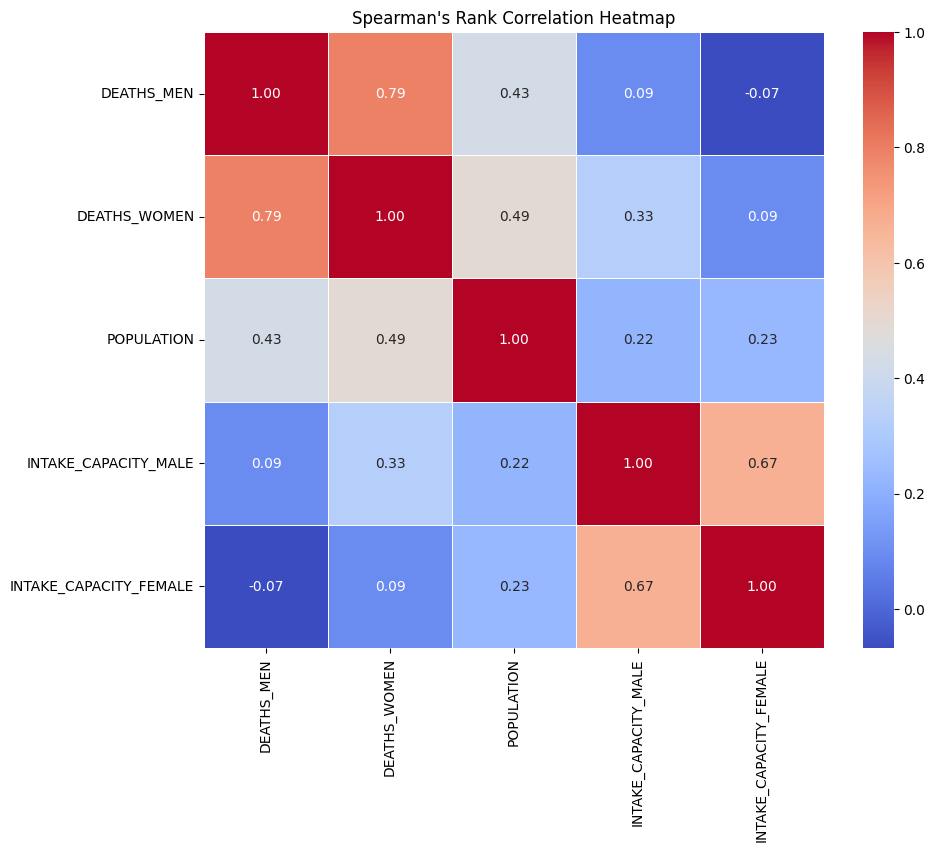

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr



# Select the variables for which you want to calculate Spearman's rank correlation coefficient
variables = ['DEATHS_MEN', 'DEATHS_WOMEN', 'POPULATION', 'INTAKE_CAPACITY_MALE', 'INTAKE_CAPACITY_FEMALE']

# Calculate the correlation matrix using Spearman's rank correlation coefficient
correlation_matrix = data[variables].corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Spearman's Rank Correlation Heatmap")
plt.show()


In [6]:
# KRUSHAL WALLIS TEST
import pandas as pd
from scipy.stats import kruskal

# Assuming your dataset is stored in a DataFrame called 'data'
# data = pd.read_csv('your_dataset.csv')

# Select the numerical variable you want to compare (e.g., deaths)
numerical_variable = 'DEATHS_MEN'

# Perform the Kruskal-Wallis test for each year
years = [2018, 2019, 2020]
for year in years:
    # Extract data for the current year
    data_year = data[data['YEAR'] == year]
    
    # Perform the Kruskal-Wallis test
    stat, p_value = kruskal(*[group[1][numerical_variable] for group in data_year.groupby('STATE')])
    
    # Interpret the results
    print(f"Kruskal-Wallis test for {numerical_variable} in {year}:")
    print(f"Kruskal-Wallis Statistic: {stat}")
    print(f"P-Value: {p_value}")
    
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference in distributions.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in distributions.")
    
    print("-" * 50)


Kruskal-Wallis test for DEATHS_MEN in 2018:
Kruskal-Wallis Statistic: 25.000000000000004
P-Value: 0.46237366292661375
Fail to reject the null hypothesis: No significant difference in distributions.
--------------------------------------------------
Kruskal-Wallis test for DEATHS_MEN in 2019:
Kruskal-Wallis Statistic: 26.999999999999996
P-Value: 0.46379481562055813
Fail to reject the null hypothesis: No significant difference in distributions.
--------------------------------------------------
Kruskal-Wallis test for DEATHS_MEN in 2020:
Kruskal-Wallis Statistic: 26.999999999999993
P-Value: 0.4637948156205588
Fail to reject the null hypothesis: No significant difference in distributions.
--------------------------------------------------


In [7]:
import pandas as pd
from scipy.stats import kruskal

# Assuming your dataset is stored in a DataFrame called 'data'
# data = pd.read_csv('your_dataset.csv')

# Select the numerical variable you want to compare (e.g., deaths)
numerical_variable = 'DEATHS_WOMEN'

# Perform the Kruskal-Wallis test for each year
years = [2018, 2019, 2020]
for year in years:
    # Extract data for the current year
    data_year = data[data['YEAR'] == year]
    
    # Perform the Kruskal-Wallis test
    stat, p_value = kruskal(*[group[1][numerical_variable] for group in data_year.groupby('STATE')])
    
    # Interpret the results
    print(f"Kruskal-Wallis test for {numerical_variable} in {year}:")
    print(f"Kruskal-Wallis Statistic: {stat}")
    print(f"P-Value: {p_value}")
    
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference in distributions.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in distributions.")
    
    print("-" * 50)


Kruskal-Wallis test for DEATHS_WOMEN in 2018:
Kruskal-Wallis Statistic: 25.00000000000001
P-Value: 0.4623736629266132
Fail to reject the null hypothesis: No significant difference in distributions.
--------------------------------------------------
Kruskal-Wallis test for DEATHS_WOMEN in 2019:
Kruskal-Wallis Statistic: 26.999999999999993
P-Value: 0.4637948156205588
Fail to reject the null hypothesis: No significant difference in distributions.
--------------------------------------------------
Kruskal-Wallis test for DEATHS_WOMEN in 2020:
Kruskal-Wallis Statistic: 27.0
P-Value: 0.46379481562055846
Fail to reject the null hypothesis: No significant difference in distributions.
--------------------------------------------------


In [8]:
import pandas as pd
from scipy.stats import kruskal

# Assuming your dataset is stored in a DataFrame called 'data'
# data = pd.read_csv('your_dataset.csv')

# Select the variable (e.g., deaths) to compare across states
variable_to_compare = 'DEATHS_MEN'

# List of unique states in your dataset
states = data['STATE'].unique()

# Dictionary to store results
results = {}

# Perform Kruskal-Wallis test for each state
for state in states:
    deaths_by_state = data[data['STATE'] == state][variable_to_compare]
    results[state] = deaths_by_state

# Perform Kruskal-Wallis test
kruskal_results = kruskal(*results.values())

# Interpret the results
print(f"Kruskal-Wallis H-statistic: {kruskal_results.statistic}")
print(f"P-Value: {kruskal_results.pvalue}")

if kruskal_results.pvalue < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference in deaths across states.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in deaths across states.")


Kruskal-Wallis H-statistic: 61.77632997843271
P-Value: 0.0003694450002758555
Reject the null hypothesis: There is a statistically significant difference in deaths across states.


In [9]:
import pandas as pd
from scipy.stats import kruskal

# Assuming your dataset is stored in a DataFrame called 'data'
# data = pd.read_csv('your_dataset.csv')

# Select the variable (e.g., deaths) to compare across states
variable_to_compare = 'DEATHS_WOMEN'

# List of unique states in your dataset
states = data['STATE'].unique()

# Dictionary to store results
results = {}

# Perform Kruskal-Wallis test for each state
for state in states:
    deaths_by_state = data[data['STATE'] == state][variable_to_compare]
    results[state] = deaths_by_state

# Perform Kruskal-Wallis test
kruskal_results = kruskal(*results.values())

# Interpret the results
print(f"Kruskal-Wallis H-statistic: {kruskal_results.statistic}")
print(f"P-Value: {kruskal_results.pvalue}")

if kruskal_results.pvalue < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference in deaths across states.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in deaths across states.")


Kruskal-Wallis H-statistic: 62.50646556431706
P-Value: 0.0002982337003534459
Reject the null hypothesis: There is a statistically significant difference in deaths across states.


In [13]:
!pip install pandas scipy statsmodels


  Using cached statsmodels-0.14.0-cp39-cp39-win_amd64.whl (9.4 MB)


You should consider upgrading via the 'C:\Users\Aroma\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [15]:
import pandas as pd
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming your dataset is stored in a pandas DataFrame called 'data'
# For example:
# data = pd.read_csv('your_dataset.csv')

# Define TOTAL_DEATHS as the sum of DEATHS_MEN and DEATHS_WOMEN
data['TOTAL_DEATHS'] = data['DEATHS_MEN'] + data['DEATHS_WOMEN']

# Perform Kruskal-Wallis test
kruskal_result = kruskal(data.loc[data['YEAR'] == 2018, 'TOTAL_DEATHS'],
                         data.loc[data['YEAR'] == 2019, 'TOTAL_DEATHS'],
                         data.loc[data['YEAR'] == 2020, 'TOTAL_DEATHS'])

# Check if the Kruskal-Wallis test is significant
if kruskal_result.pvalue < 0.05:
    # Perform post-hoc Tukey's test for pairwise comparisons
    posthoc = pairwise_tukeyhsd(data['TOTAL_DEATHS'], data['STATE'])
    print(posthoc)
else:
    print("Kruskal-Wallis test not significant, no further analysis needed.")


Kruskal-Wallis test not significant, no further analysis needed.


C:\Users\Aroma\AppData\Local\Temp\ipykernel_12508\3709141056.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TOTAL_DEATHS'] = data['DEATHS_MEN'] + data['DEATHS_WOMEN']
